<h1 style='color: pink; font-weight: bold; text-align: center;'>Salary Predictor</h1>

<p style='text-align: center;'> This notebook aims to store the code of a simple linear regression - where predicts the salary based on the years of experience. The dataset was provided by Allena on Kaggle.. </p>

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

uri = './data/salary_dataset.csv'

df = pd.read_csv(uri).iloc[:, 1:].sort_values(by='YearsExperience')

df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


### Quick EDA

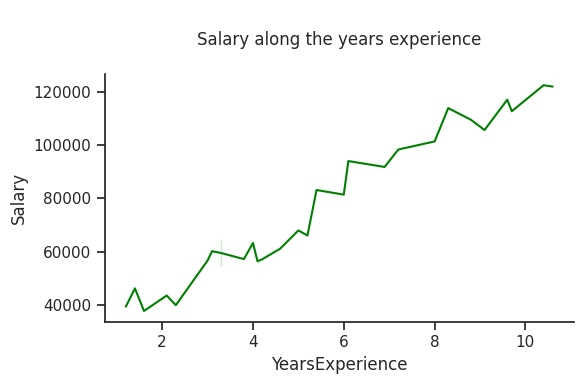

In [61]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

plt.figure(figsize=(6, 4))

ax = sns.lineplot(
  df,
  x='YearsExperience',
  y='Salary',
  color='green',
)

ax.set_title('\nSalary along the years experience\n')
plt.tight_layout()
plt.show()

In [63]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.413333,2.837888,1.2,3.30,4.8,7.80,10.6
Salary,30.0,76004.000000,27414.429785,37732.0,56721.75,65238.0,100545.75,122392.0


### Conversion to monthly Brazilian Reals

In [74]:
def conversion(salary: float):
  USD_TO_BRL = 5.1717013   # Considering U$1
  BRL_TO_USD = 0.19335997  # Considering R$1
  
  yearly_salary = salary / BRL_TO_USD
  monthly_salary = (yearly_salary) / 12
  
  return monthly_salary
  
conversion(39344.0)
  

16956.284522937538

### Modeling

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = df['YearsExperience'].values
y = df['Salary'].values

x_train, x_test, y_train, y_test = train_test_split(
  x,
  y,
  train_size = .6,
  test_size = .4,
  random_state = 1000
)

print(f'Train size: {len(x_train)}\nTest size: {len(x_test)}')

Train size: 18
Test size: 12


In [124]:
model = LinearRegression()

model.fit(x_train.reshape(-1, 1), y_train.reshape(-1, 1))

LinearRegression()

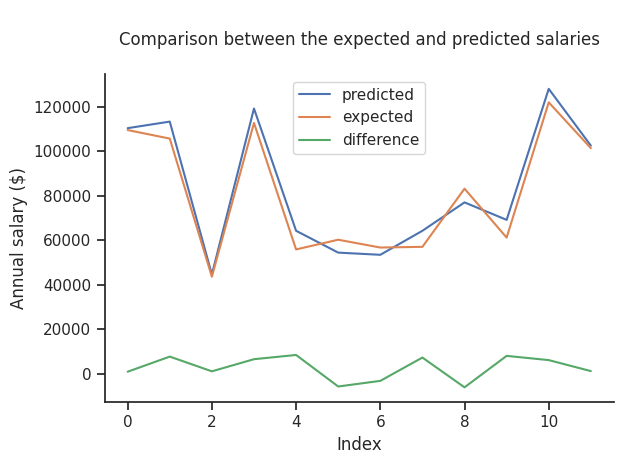

In [174]:
predicted = model.predict(x_test.reshape(-1, 1))
expected = y_test.reshape(-1, 1)

data = dict({
  'predicted': [x[0] for x in predicted.tolist()],
  'expected': [x[0] for x in expected.tolist()]
})

comparison_df = pd.DataFrame(data)
comparison_df['difference'] = comparison_df['predicted'] - comparison_df['expected']

ax = comparison_df.plot()

ax.set_title('\nComparison between the expected and predicted salaries\n')
ax.set_xlabel('Index')
ax.set_ylabel('Annual salary ($)')

plt.tight_layout()
plt.show()


### Quick validation

In [194]:
a = x.reshape(-1, 1)[:10]
a

array([[1.2],
       [1.4],
       [1.6],
       [2.1],
       [2.3],
       [3. ],
       [3.1],
       [3.3],
       [3.3],
       [3.8]])

In [195]:
b = y.reshape(-1, 1)[:10]
b

array([[39344.],
       [46206.],
       [37732.],
       [43526.],
       [39892.],
       [56643.],
       [60151.],
       [54446.],
       [64446.],
       [57190.]])

In [196]:
c = model.predict(np.array([1.2]).reshape(-1, 1))
c

array([[35719.98127996]])

In [212]:
d = '{:,.2f}'.format(b[0][0] - c[0][0])
d 

'3,624.02'